<a href="https://colab.research.google.com/github/manavkdubey/dog-breed-identification/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This is a colab notebook

# This is a google colab notebook for dog breed identification

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

2.13.0
0.14.0


### Turning data into tensors

In [3]:
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/colab/labels.csv")

In [4]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [5]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: >

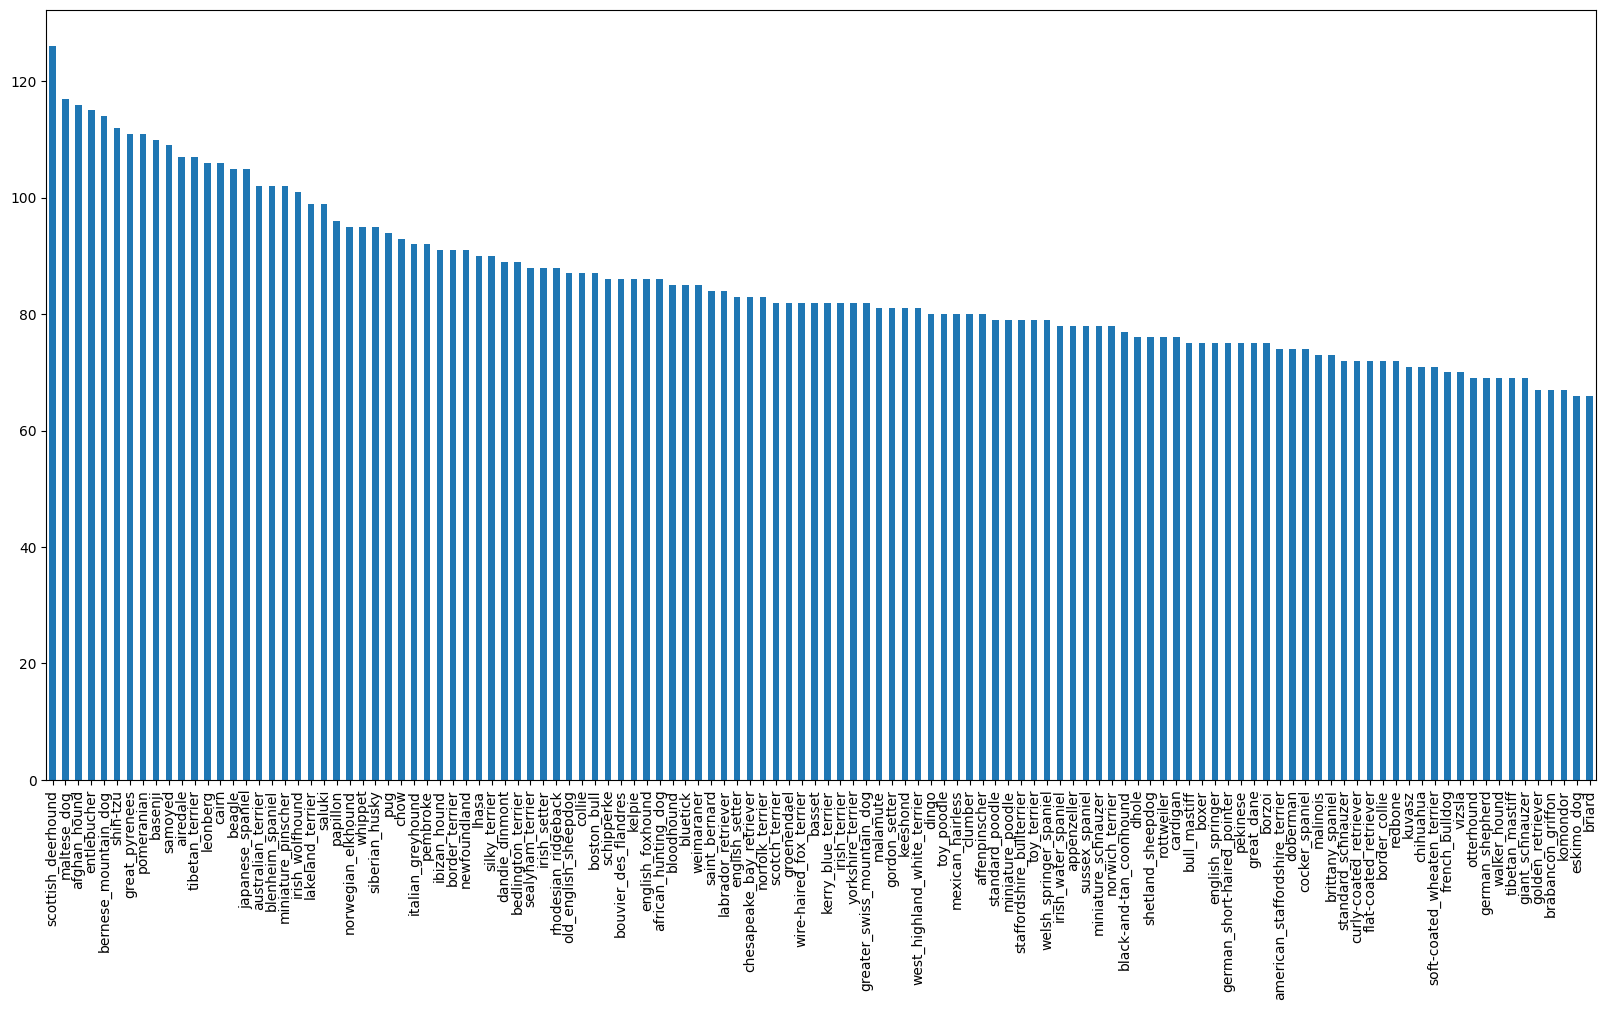

In [6]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [7]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [8]:
from IPython.display import Image
filenames= ["/content/drive/MyDrive/colab/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]


['/content/drive/MyDrive/colab/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/colab/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/colab/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/colab/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/colab/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/colab/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/colab/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/colab/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/colab/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/colab/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
import os
if len(os.listdir("/content/drive/MyDrive/colab/train/"))==len(filenames):
  print("proceed")
else:
  print("Error")

proceed


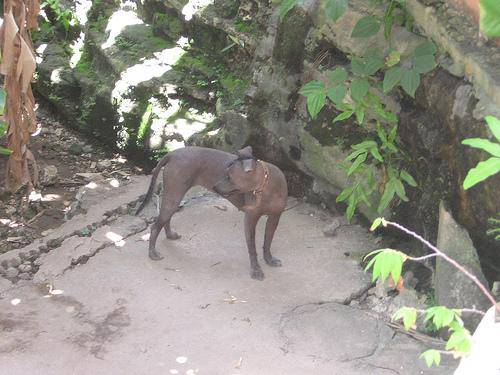

In [10]:
Image(filenames[901])


In [11]:
import numpy as np
labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)==len(filenames)

True

In [13]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
boolean_labels=[label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [16]:
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [17]:
x=filenames
y=boolean_labels

Start with small data and increase as needed

In [18]:
NUM_IMAGES= 1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

## Preprocessing Images

In [20]:
from matplotlib.pyplot import imread
image=imread(filenames[100])
image.shape

(500, 500, 3)

In [21]:
image.max()

255

In [22]:
IMG_SIZE=224
def process_image(image_path):
  """Takes an image path and turns image into tensor"""
  image=tf.io.read_file(image_path)

  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])


  return image

### Turning data into batches

In [23]:
def get_image_label(image_path,label):
  image=process_image(image_path)
  return image,label

In [24]:
BATCH_SIZE=32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch= data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                             tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

In [25]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)


Creating training data batches...
Creating validation data batches...


In [26]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [27]:
import matplotlib.pyplot as plt
def show_25_image(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [28]:
train_images,train_labels =next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

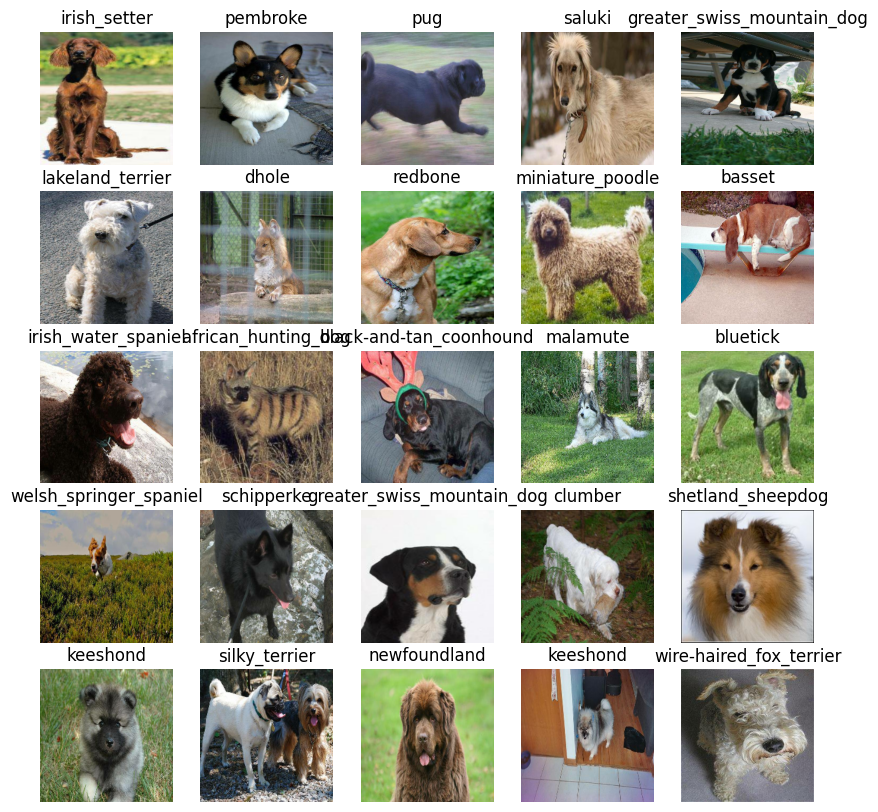

In [29]:
show_25_image(train_images,train_labels)

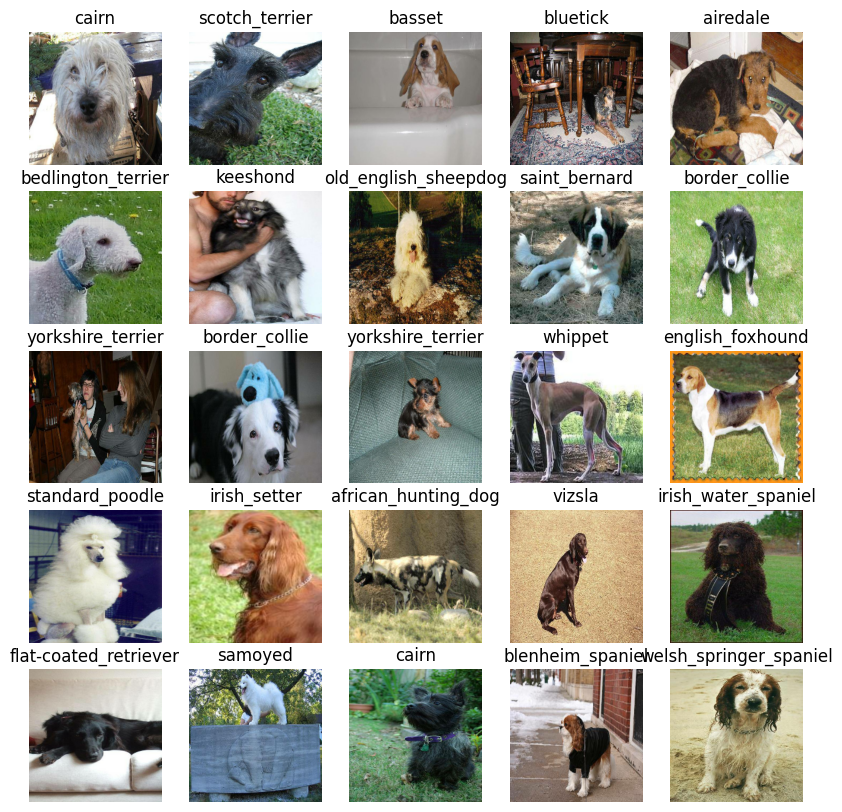

In [30]:
val_images,val_labels =next(val_data.as_numpy_iterator())
len(val_images),len(val_labels)
show_25_image(val_images,val_labels)

In [32]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [41]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with: ",MODEL_URL)

  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(INPUT_SHAPE)
  return model

In [44]:
model=create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_6 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________
